# CS51 - Algorithms and Simulation

# <font size="5"> by César Emanuel Castro García</font>

<div class="alert alert-block alert-success">
<b> <font size="5">Part I: Genetic Regression Algorithm</font></b> 
</div>

The following notebook contains a set of python functions that attempt to use a **genetic algorithm** to find the **regression line** for a dataset by looking for the two coefficients _**(m, b)**_ of the line of best fit. For each function, there is in-line comments and brief descriptions explaining what the function does step-by-step, and the roles they play in the genetic algorithm.

<div class="alert alert-block alert-warning">
<b>1. Function Description</b> 
</div>

##### 1.1. Commenting Algorithm
- For each of the functions, I have added in-line comments to explain what the code is doing line-by-line. In addition to in-line comments, I have written a few sentences that address the identification of the aspect of a genetic algorithm that the function pertains to and explained why this aspect is important for optimization, described how the function accomplishes its task, and specified the inputs, outputs, and any major data structures involved.  

##### 1.2. Finalizing Algorithm
- Using a process of elimination to determine, then describe, which common element of a genetic algorithm is needed in this program, I created function F. I detailed why this element of the algorithm is important for finding an optimal solution. Then, filled in function F with working code that accomplishes this task and explained how it works.

##### 1.3. Genetic Algorithm
- For the commenting of the python script, I considered the main program portion of the code and added comments and explained what this part does and how it connects to the functions.

### BACKBONE OF THE ALGORITHM

In [61]:
# Genetic algorithm to fit a regression line of the 
# form y = mx + b to a 2-variable dataset.

import random 
# The random module is a library of functions that is built into python. 
# The line of code "import random" is needed to get access to it. 
import numpy as np 
# The numpy package is fundamental for scientific computing, 
# the line of code "import numpy as np" is needed to get access to it 
# and to call it further in the script as only "np".

# Load the data
my_data_file = 'temp_data.npy' # By using the equal operator, this line of code assigns the "temp_data.npy" 
                               # to the variable "my_data_file"

data = np.load(my_data_file) # By using the equal operator, this line of code assigns "np.load(my_data_file)"
                             # to the variable "data". Also, np.load helps to load arrays or pickled objects
                             # from .npy, .npz or pickled files, such as the "my_data_file" which is an .npy file

# Parameters
initial_pop_size = 1000 # Using the equal operator assigns a specific value to the variable "initial_pop_size"
mutation_rate = 0.30    # Using the equal operator assigns a specific value to the variable "mutation_rate"
num_generations = 10    # Using the equal operator assigns a specific value to the variable "num_generations"
chromosome_length = 2   # Using the equal operator assigns a specific value to the variable "chromosome_length"
num_survivors = 200     # Using the equal operator assigns a specific value to the variable "num_survivors"

The aspect of a genetic algorithm that this part pertains to is importing relevant libraries, loading the data, and giving specific values to the parameters needed for the genetic algorithm. This is important for optimization because the libraries functions allow us to do different computations and calculations. It accomplishes it task by running through the code which without this everything else doesn't work. This part is not a function, so it doesn't really get inputs, and doesn't provide any outputs.

### CREATING A RANDOM SAMPLE POPULATION

In [62]:
def A(): # This line of code "def A():" does several things,
         # for one "def" is short for define and basically defines the function 
         # then, A is function name and the parenthesis will contain the 
         # parameters every time the function is called, however in this case
         # no positional values are needed, just for the function to be called.

    gene_pool = np.linspace(-1,80,num = 5000) # Using the equal operator assigns "np.linspace(-1,80,num = 5000)" to 
                                              # the variable "gene_pool". Also, the function "linspace" in the "numpy"
                                              # or "np" library returns evenly spaced numbers given by "num = 5000"
                                              # and has starting value: "-1" and an end value: "80"
    
    dimensions = (initial_pop_size, chromosome_length) 
    # Using the equal operator assigns "(initial_pop_size, chromosome_length)" to
    # the variable "dimensions". Also, a 2-tuple is given because "dimensions"
    # will be used as the parameter "size" in "np.random.choice" where there will
    # be samples drawn based on the values of these (the product).
    
    return np.random.choice(gene_pool, size=dimensions, replace=False)
    # The "return" function is used here as the final purpose of "A"
    # since when one calls "A", this line of code will tell it what to do.
    # Also, "np.random.choice" here generates the random sample based on
    # the "gene_pool" array and "replace" determines the sample is without replacement.

The goal of this function is to initialize a random list of candidate solutions from $5,000$ equal spaced numbers between $-1$ and $80$. With such a large population to choose from we can have a good enough variance in the first generations. From this population, it randomly selects our first generation according to the given parameter size without any repetition. If we would allow replacement from the to-be-chosen elements, we would choose _$True$_ rather than _$False$_ on the return line. Function A takes no input and outputs a two dimensional array of $100$ tuples of the form $(m, b)$ where the first element is the $slope$ and the second element is the $y-intercept$.

### EVALUATION OF THE FITNESS VALUE OF AN ARRAY

In [63]:
def B(coefficients): # This line of code "def B(coefficients):" takes one positional argument,
                     # "def" is short for define and defines the function 
                     # B is function name and the parenthesis will contain the 
                     # parameters every time the function is called. 

    k = len(data) # Using the equal operator assigns "len(data)" to the variable "k"
                  # also, len returns an integer which is the number of values
                  # in the 'temp_data.npy'

    tot = 0 # Using the equal operator assigns the value of "0" to the variable "tot"
            # and later into the function, "tot" which is short for total will have a greater value



## FORMULA FOR CALCULATING THE FITNESS (THE LOWER IT IS, THE BETTER OUR PREDICTED VALUE)
    for j in range(k): # Here, the for loop with range helps to procede with the following calculations:
                       # for the range function we have the maximum value that in here is "k"
                       # here "j" is a variable to talk in general about the values found here.
        
        y = coefficients[0] * data[j,0] + coefficients[1]
        # Here we find the formula in the form of "y = mx + b", where the coefficients are [m, b]
        # which are the ones that are going to be checked for their error with tot/k
        
        res = data[j,1] - y 
        # Here "res" is short for "residual" which is needed for the calculation of the fitness value.
        
        tot += res**2 
        # Here the residuals are squared because some might be positive and some might be negative.

    return tot/k
    # Finally tot/k is the needed calculation for the error.

The goal of this function is to give the expected error or in other words the fitness value. This fitness value allows us to determine the better candidate solutions and to select the survivors. Using the $slope$, $y-intercept$ value, and $x$ from the data set, it calculates the predicted $y$ by the equation and measures its difference from the observed $y$ value given in the dataset. Then it calculates the variance, the average squared sum of the error. The fitness value is the error, so the less it is the better the candidate solution. The input it takes is the candidate solution which is an array of $2$ element in the form of $(m, b)$. The output that it returns is $\frac{SSE}{n}$ which is its fitness value.

### CREATION OF NEW LIST WITH FITNESS VALUE

In [64]:
def C(): # This line of code "def C():" takes no positional argument,
         # "def" is short for define and defines the function 
         # C is function name and the parenthesis will contain the 
         # parameters every time the function is called, however in this case
         # no positional values are needed. Just the function needs to be called.

    fitlist = []
    # Using the equal operator this assigns an empty list to the variable "fitlist"
    
    q = len(current_pop)
    # Using the equal operator this assigns "len(current_pop)" to the variable "q"
    # len returns an integer which is the number of values in "current_pop"

                # Here I would like to [footnote] #organization because aiming to organize the code
                # in a way that is easier to understand and remember, I decided that this would look
                # better organized.
    
    for x in range(q):
    # Here, the for loop with range helps to procede with the following calculations:
    # for the range function we have the maximum value that in here is "q" [See previous comment]
    # here "x" is a variable to talk in general about the values found here.   
    
        fitlist.append(np.array([x,B(current_pop[x])]))
        # This line of code does different things at different scales and levels of analysis,
        # at first it uses the append() method to append an element to the end of the list "fitlist"
        # next, it uses np.array to create an array with the following:
        # the variable "x" and the result of the previous function "B" when the 
        # coefficient is current_pop[x]
        
    return np.array(fitlist)
    # Finally, the "return" function is used here as the sole reason of "C"
    # since when one calls "C", this line of code will tell it what to do.
    # Here "np.array" creates an array with the list "fitlist"

The goal of this function is to create a new list of the fitness values of all candidate solutions of the current population into the fitlist. This will also be useful in the next function in identifying index. It creates an empty array. Then for each candidate solution of the current population, it creates their fitness value and stores them in the empty array according to their initial index. This function takes no input and outputs a two dimensional array with the same row size of the current population. Each of these rows have the same index as the candidate solution and its respective fitness value.

### SELECTION OF SURVIVORS (BEST CANDIDATE)

In [65]:
def D(): # This line of code "def D():" takes no positional argument,
         # "def" is short for define and defines the function 
         # D is function name and the parenthesis will contain the 
         # parameters every time the function is called, however in this case
         # no positional values are needed. Just the function needs to be called.    
    
    p = len (fitness_vector)
    # Using the equal operator assigns "len (fitness_vector)" to the variable p
    # to make my algorithm more organized and neat.
    
    random_selection = np.random.choice(range(p), num_survivors//2, replace=False)
    # Using the equal operator assigns "np.random.choice" that generates the random sample (array) based on
    # the range of "p" and "replace" determines the sample is without replacement (it will not take any value
    # repeatedly).
    
    best = np.argmin(fitness_vector[random_selection,1])
    # Using the equal operator assigns the np.argmin which returns the indices of
    # the minimum values along an axis.

    best_index = random_selection[best]
    # Using the equal operator assigns random_selection[best] to the variable
    # "best_index"

    return current_pop[int(fitness_vector[best_index][0])]
    # This will be what will be returned when the function "D" is called.

This function gives the best candidate solution when you input an array into it. Every time the whole genetic algorithm runs it will give a different _best candidate_. It randomly chooses some elements and finds the most fitted candidate solution among them. This random selection increases the probability of survivor for the most fitted solutions but also give space for some variations. The reason why we randomly choose is because we want to maintain this diversity in the population that the function will produce. Among these candidate solutions, it finds the one with the least fitness value and outputs it. It takes no input and outputs the candidate solution for which the fitness value is the minimum.

### CREATING NEW POPULATION BY DUPLICATING SURVIVORS 

In [66]:
def E():
# Creates a new generation (an array of arrays) by duplicating the survivors.
    
    duplicate_size = len(new_population) - len(survivors)
    # Calculating how many more candidate solution needed to generate beside the survivors
    # in order to complete the next generation (array of arrays).
    
    duplicate_survivors = np.zeros((duplicate_size, chromosome_length))
    # Creates the necessary number of new arrays in which every value is 0.
    
    for x in range(chromosome_length): 
    # For each column in the survivor array, the following will happen:
                
        duplicate_survivors[:, x] = np.repeat(survivors[:, x], 4, axis=0) 
        # Duplicate column 4 times.     
        
        duplicate_survivors[:, x] = np.random.permutation(duplicate_survivors[:, x])
        # Make a random permutation of the candidate solutions of the new generations.
        
    return duplicate_survivors
    # Returns the new generation.

The goal of this function is it to generate a new population by duplicating the survivors. It helps to build new generations where only the most fitted values are represented. It increases the probability to find the best solution despite decreasing variation. It repeatedly copies the survivor solutions, and shuffles the values inside the array to ensure randomization. It takes no input and outputs the generated array of duplicate survivors.

### MUTATING THE POPULATION

In [67]:
def F(array):
# Tweaks a randomly selected value to bring variations in population.
    
    mutation_size = int(len(array)*mutation_rate)
    # Determines the size of mutated candidate solutions
    # by using the mutation rate of the population.
    
    mutation_selection = np.random.choice(range(len(array)), mutation_size, replace=False)
    # Randomly select 'mutation_size' number of indexes of the cuurrent population
    # to tweak the candidate solutions of those indexes.
    
    mutation_pop = array
    # Copy the given population in the mutation population.
    
    for i in mutation_selection:
    # For each randomly selected index.
        
        mutation_pop[i] = [array[i][1],array[i][0]]  
        # Swap the two values of the candidate solution.
    
    return mutation_pop
    # Returns the mutated population.

The major elements of a Genetic Algorithm are Population Initialization, Fitness Function Calculation, Crossover or Mutation, Survivor Selection, New Generation, and a Termination Condition. Function A works for Population Initialization, Function B is the Fitness Function, Function C works to store the Fitness Values, Function D does Survivor Selection, and Function E creates New Generations. So, the missing important element is Mutation or Crossover. One of our given parameters is mutation rate so we can use it to do mutation with Function F. Mutation is the process of tweaking the values of some randomly selected values. This creates explorations and variations in the population space. Mutation ensures the existence of other solutions with the most fitted values which mitigate the probability of getting stuck in a local optimum. This function randomly selects some integers in the range of population size. Then it swaps the $(m, b)$ values of the candidate solutions whose indexes are equal to these randomly selected integers. It takes the population array as an input and outputs the population array with some randomly mutated candidate solutions.

### MAIN PROGRAM: BEST SOLUTION

In [68]:
# Start of main program

current_pop = A()
# List of the current population, which initializes a new population using our previously created function.

new_population = np.zeros((num_survivors * 5, chromosome_length))
# New population, filled with zeros, by pasting all survivors 5 times each. The chromosome-length
# determines how many columns to have.

# Main Loop
for i in range(num_generations):
# Iterates the loop for the previously selected number of generations.
    
    fitness_vector = C()
    # Assign the fitness vector to be the list of the fitness values and different individuals.
    
    survivors = np.zeros((num_survivors, chromosome_length))
    # New array of survivals, currently filled with zeros.
    # Since,chromosome length is 2, we will have 2 columns and the num_survivors will fill the cells.
    
    for n in range(len(survivors)):
    # For the indices in the survivors' array.
    
        survivors[n] = D()
        # Each survivor integer's assigned to the index of best fitness value.
        
    new_population[:len(survivors)] = survivors
    # New population from 0 to the entire length of survivors, we will call that survivors.
    
    new_population[len(survivors):] = E()
    # From the length of survivors onwards, this will be in the duplicate survivors.
    
    new_population = F(new_population)
    # Uses the mutation function to tweak some randomly selected candidate solutions.
    
    current_pop = new_population
    # Copies the next generation population in the array for the current population.
    
    new_population = np.zeros((num_survivors * 5, chromosome_length))
    # Changes the next generation population with 0
    # to make it ready to store next generations.

fitness_vector = C()
# Creates the array of fitness value of the last generation.

best_solution = current_pop[np.argmin(fitness_vector[:,1])]
# The best solution is the value of the current population,
# for which fitness value is the minimum.

print("The best solution is", best_solution)
# Printing the best solution for (m, b)

print("with error equal to approximately", B(best_solution))
# Printing the SSE/n from the best solution.

The best solution is [ 0.28005601 73.21084217]
with error equal to approximately 39.38772750501804


This is the main program which will make use of the previous functions by connecting them to complete the genetic algorithm. The output of this function is the best solution which correspond to $(m, b)$ in the equation of the best fit line $y=mx+b$. After every fuction from A to F has run the main program uses them to finally produce the best solution. At first, it generates an initial population using Function A and keeps it in _current population_. It then generates another empty array named _new population_ for storing the next generations. After that, it starts a loop which will be iterated for the pre-defined number of generations. In each iteration, it creates an array of the fitness values for each candidate solution of the current population according to their indexes. It creates an empty array to store the survivors then select each survivor one by one by repeatedly using function D. Function D compares some randomly selected values of the fitness value array and returns the candidate solution corresponding the least fitness value among them. Then it stores the survivor candidates in the new population and fills the other spaces using the duplicate of survivors generated by function E. Then it mutates some random value using function F. After reaching the predefined generation, the loop terminates. It calculates the fitness values of the last generation and outputs the best fitted candidate solution with its error.

### COMPARISON

In [69]:
# This line of code uses scipy regression function to compare with the genetic algorithm's solutions.
from scipy import stats
print(stats.linregress(data)[0:2])

(0.5399259393210745, 70.70997220684585)


This allows us to compare the generated best solution with the main program with the actual solution set which in this case is (0.54, 70.71) when rounded to two decimal values.

<div class="alert alert-block alert-warning">
<b>2. Function Overview</b> 
</div>

##### 2.1. Importance of Parameter Values
- The parameters at the top of the script are variables that can be assigned different values in order to run through the genetic algorithm. The parameter **initial_pop_size** is the initial population size which in genetic algorithms, is where we select the population of possible solutions. The parameter **mutation_rate** is how much of the population we will mutate. Mutating a high value like means that we will loose even the most fit values. The parameter **num_generations** is how many times this process will be repeated and how many generations we want to determine a solution. The parameter **chromosome_length** is the number of elements in one candidate solution. Here we want to determine two elements: the $slope$, and the $y-intercept$. Our chromosome length is 2 and we cannot change it in this problem. The parameter **num_survivors** is the number of candidate solution we want to select for our next generation based on their fitness value. Through experimentation with varying parameter values, I determined that the values that produce solutions that are closest to the actual solution most efficiently are the following: **initial_pop_size** $= 1,000$, **mutation_rate** $= 0.30$, **num_generations** $= 10$, **chromosome_length** $= 2$, **num_survivors** $= 200$. I think this happens because the initial population size, mutation rate, and number of survivors parameters are moderately large as expected. The number of generations is not as high because the solution doesn't change after the $4th$ or $5th$ iteration.

##### 2.2. Program Overview
- The following is an overview of how this program solves the given task by achieving different things. The output of this program represents an array that consists of the optimal value of the $slope$ and $y-intercepts$. It also, prints the error value of that solution. This program covers all the steps that one finds and goes through in the genetic algorithm to identify variables that will be the most useful for an accurate regression model. In order to determine what is the most useful, that is where the objective function is helpful to identify whether we want to either maximize or minimize it. In this case, the error in the regression model should be minimized. This explains the concept of the fitness value that we identified in the code, where we have the fitness value of each of the candidate solutions. Hence, individuals with the lowest fitness values are the most accurate for the model.

<div class="alert alert-block alert-danger">
<b>END OF PART I</b> 
</div>

<div class="alert alert-block alert-success">
<b> <font size="5">Part II: Lotka-Volterra Simulation</font></b> 
</div>

In this portion of the assignment, I produced code that uses Euler’s method to implement a simulation of the solutions of the Lotka-Volterra equations. In addition to providing more practice in Python programming, this project challenged me to understand numerical methods for solving differential equations, which lead to a deeper understanding of these models.

<div class="alert alert-block alert-warning">
<b>1. Simulation Code</b> 
</div>

The following code inputs the initial ($t=0$) populations for predator and prey, parameter values, desired final output time, and time-step size ($h$), and outputs graphs of both predator and prey populations at each time-step on the same plot; final predicted population sizes for both predator and prey. I wrote comments for each defined function, specifying inputs and outputs, along with a brief description of what the function does. I also considered my initial parameter inputs, explained how the result changes as the initial parameters vary, found a set of initial parameters that produced stable cyclic population dynamics, and explained the significance of this.

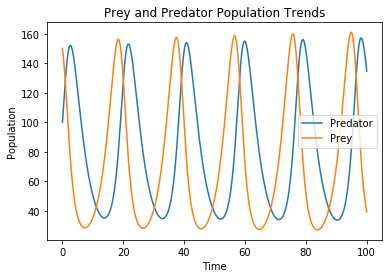

In [70]:
import numpy as np
import matplotlib.pyplot as plt

#Lotka-Voltera Equations:
#dx/dt = (a*x) - (b*x*y)
#dy/dt = (-c*y) + (d*x*y)

#Parameters
a = 0.4
b = 0.005
c = 0.3
d = 0.004
h = 0.01 #time step size: the smaller the better


#Creating lists of values. The stored values will be plotted
t_list = [0] #create a list to store the t-values

prey =[150] #create a list to store all values of prey population

predator = [100] #create a list to store all values of predator population

for i in range (0,10000):

    y = predator[-1] #identifying the current predator population
    x = prey[-1] #identifying the current prey population
    t = t_list[-1] #identifying the current time
    t_next = t + h #adding the next time to the step size
    y_next = (y + (((-c*y) + (d*x*y)) * h)) #formula for calculating the next predator population
    x_next = (x + (((a*x) - (b*x*y)) * h)) #formula for calculating the next prey population
    t_list.append(t_next) #after getting a new t, updating the list by adding the new value
    prey.append(x_next) #updating the prey population, adding the new value
    predator.append(y_next) #updating the predator population by adding the new value

# print(predator)


import matplotlib.pyplot as plt #importing a useful library in plotting

plt.plot(t_list, predator, label='Predator')
#the first y-variable, predators, plotted with respect to t.
#I put color blue to make it distinct from the prey curve line

plt.plot(t_list, prey, label='Prey')
#the second y-variable, prey population, to be plotted.
#I put color orange so that I see which of the curves shows the prey population trends
#dataviz: inserting labels and title for an observer to know what the plot represents.

plt.legend()
plt.xlabel('Time')
plt.ylabel('Population')
plt.title('Prey and Predator Population Trends')
plt.show()

<div class="alert alert-block alert-warning">
<b>2. Simulation Analysis</b> 
</div>

This simulation is quite intricate. It has many similarities and differences with the NetLogo Wolf Sheep Predation model from class. My simulation contrasts with an analytical approach to deriving the implications of the Lotka-Volterra model by making numerical calculations. There are some differences between the Lotka-Volterra model and my simulation. For example, the Lotka-Volterra model is continuos and the simulation here is discrete. This is because for each time point, we have the relevant and correspondent prey and predator population. Every plotted data point is connected to the next one by using a curve line. This is different from the Lotka-Voltera which is a continuous model since the solutions to differential equations are multiple functions and allows to determine the population at any given time. The NetLogo simulation is stochastic. This is because of the randomness in the prey and predator population trends and their movements. 

The above simulation is deterministic. This is in function form, one value has just one other corresponding value so there is no randomness in the results or values that we obtain and this is what deterministic solutions portray. The main assumptions in the above model can be seen through the formula. The causes of death, we see that in the rate at which the change in prey population is happening only decreaseses when the prey interact with the predator. There are multiple conditions that might make the prey population decrease such as climate change. In the rate of change of the predator population which is only reduced by one we see a similar scenario. In the second equation we are also making the assumption that the predator population only increases when they feed on the prey. Which is not necessarily true because there are multiple reasons and ways through which the predator population could increase. For instance, if there is reproduction the population is eventually going to increase. However, it does not take this into consideration, making this assumption one of the inherent weakness of the function.

<div class="alert alert-block alert-danger">
<b>END OF PART II</b> 
</div>

<div class="alert alert-block alert-success">
<b> <font size="5">Part III: Reflection</font></b> 
</div>

To complete the assignment, I obtained the knowledge from the readings and classes through distributive practice.$^1$ The readings from both session 5.2 and 7.1 were particularly helpful to further understand the concepts.  Specific individuals and groups that helped me where Prof. Albrecht and Prof. Richard who both helped me by challenging me during class and office hours to engage in programming, statistics, algorithms, and simulation. Strategies that I used to assess my own understanding of the material where different science of learning techniques.$^2$ I read from the tutorials of the genetic algorithms, and used the Wikipedia readings for the Lotka-Volterra model. I used a CSS code found in stackoverflow (Aquagremlin, 2015) to change the font, color, size, and style of the notebook.



**___** **___** **___** **___** **___** **___**

<font size="3">$^1$ #selfawareness: The first part of this assignment challenged me by allowing me to understand what each individual function does for the genetic algorithm. Using appropriate resources like readings, classes, and further research helped me craft a well-written description of the algorithm. In the second part of the assignment, I was able to understand what each part of the Lotka-Volterra model does and was in better position to use online research more effectively. For things that I did not know how to write python code for, I resorted to the use of resources like stackoverflow.</font>

<font size="3">$^2$ #professionalism: A particularly novel way that I applied professionalism while solving problems that seemed challenging was to reach out to classmates. For instance, on the Lotka Voltera model, I reached out to classmates that continuously prompted me to think what I needed to do. I made errors along the way but they helped me realize the errors that I had made.</font>

<div class="alert alert-block alert-danger">
<b>END OF PART III</b> 
</div>

<div class="alert alert-block alert-success">
<b> <font size="5">Part IV: References</font></b> 
</div>

Aquagremlin. (2015). How to change the font size and color of markdown cell in Ipython (py 2.7) notebook. Retrieved from https://stackoverflow.com/questions/34303422/how-to-change-the-font-size-and-color-of-markdown-cell-in-ipython-py-2-7-noteb

Lotka–Volterra equations. (n.d.). In Wikipedia, The Free Encyclopedia. Retrieved from https://en.wikipedia.org/wiki/Lotka%E2%80%93Volterra_equations

M. Beals, L. Gross, & S. Harrell. (1999). Predator-prey Dynamics: Lotka-Volterra. Retrieved from http://www.tiem.utk.edu/~gross/bioed/bealsmodules/predator-prey.html

TutorialsPoint. (2017). Genetic Algorithms. Retrieved from https://www.tutorialspoint.com/genetic_algorithms/genetic_algorithms_introduction.htm

Wilensky, U. (1997). NetLogo Models Library: Wolf Sheep Predation. Retrieved from http://ccl.northwestern.edu/netlogo/models/WolfSheepPredation

<div class="alert alert-block alert-danger">
<b>END OF PART IV</b> 
</div>

<div class="alert alert-block alert-success">
<b> <font size="5">Part V: Format and Style</font></b> 
</div>

In [39]:
from IPython.core.display import HTML
HTML("""
<style>

div.cell { /* Tunes the space between cells */
margin-top:1em;
margin-bottom:1em;
}

div.text_cell_render h1 { /* Main titles bigger, centered */
font-size: 2.2em;
line-height:1.4em;
text-align:center;
}

div.text_cell_render h2 { /*  Parts names nearer from text */
margin-bottom: -0.4em;
}


div.text_cell_render { /* Customize text cells */
font-family: 'Times New Roman';
font-size:1.5em;
line-height:1.4em;
padding-left:3em;
padding-right:3em;
}
</style>
""")


<div class="alert alert-block alert-danger">
<b>END OF PART V</b> 
</div>